In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
import datetime
import PIL
import warnings
warnings.filterwarnings("ignore")
import os
import cv2


In [21]:

#sciezka do pliku

image_path = "/content/drive/MyDrive/Dane do projektu DL The Chaos Makers /Projekt DL/Nowy folder/images labeled/images labeled/disco/3_0.jpg"
img = cv2.imread(image_path)

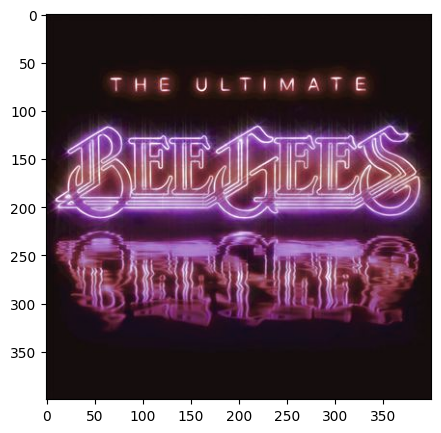

In [22]:
fig = plt.figure(figsize=(10, 5))
plt.imshow(img)
plt.show()

In [23]:
def load_images_and_labels(categories):
    img_lst = []
    labels = []

In [24]:
# Ładowanie i wstępne przetwarzanie obrazów

categories = ['disco', 'electro', 'folk', 'rap', 'rock']

def load_images_and_labels(categories):
    img_lst = []
    labels = []

    # Przechodzenie przez kategorie i obrazy w każdej kategorii
    for index, category in enumerate(categories):
        for image_name in os.listdir(fr'/content/drive/MyDrive/Dane do projektu DL The Chaos Makers /Projekt DL/Nowy folder/images labeled/images labeled/{category}'):
            # Wczytywanie obrazu i zmiana rozmiaru na 180x180 pikseli
            img = cv2.imread(fr'/content/drive/MyDrive/Dane do projektu DL The Chaos Makers /Projekt DL/Nowy folder/images labeled/images labeled/{category}/{image_name}')
            img_array = cv2.resize(img, (180, 180))
            img_lst.append(img_array)
            labels.append(index)

    return img_lst, labels

img_lst, labels = load_images_and_labels(categories)
print(len(img_lst))
print(len(labels))



3470
3470


In [25]:
img_lst, labels = load_images_and_labels(categories)
print(len(img_lst))
print(len(labels))

3470
3470


In [26]:
# Konwersja list na numpy arrays
img_lst = np.array(img_lst)
labels = np.array(labels)

In [27]:
# Podział na zbiór treningowy i testowy
x_train, x_test, y_train, y_test = train_test_split(img_lst, labels, test_size=0.1, random_state=42)

In [28]:
# Normalizacja wartości pikseli do zakresu od 0 do 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [29]:
# Konwersja typu danych na float32
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

In [30]:
print(f'Ilość zdjęć dla zbioru treningowego: {x_train.shape[0]}')
print(f'Ilość zdjęć dla zbioru testowego: {x_test.shape[0]}')


Ilość zdjęć dla zbioru treningowego: 3123
Ilość zdjęć dla zbioru testowego: 347


In [31]:
# Transformacja etykiet na one-hot encoding
y_train = tf.one_hot(y_train, depth=len(categories))
y_test = tf.one_hot(y_test, depth=len(categories))

print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)


y_train.shape: (3123, 5)
y_test.shape: (347, 5)


In [32]:
# Sprawdzenie rozmiarów wejściowych obrazów
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

class_names = categories
num_classes = len(class_names)

x_train shape: (3123, 180, 180, 3)
x_test shape: (347, 180, 180, 3)


In [34]:
def create_cnn_model(input_shape, num_classes):
    # Tworzenie modelu CNN
    model = Sequential([
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(units=64, activation='relu'),
        layers.Dense(units=num_classes, activation='softmax')
    ])

    return model


In [35]:
# Tworzenie modelu CNN
model = create_cnn_model((180, 180, 3), num_classes)

In [36]:
# Kompilacja modelu
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [37]:
# Wyświetlenie podsumowania modelu
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 253472)            0         
                                                                 
 dense (Dense)               (None, 64)                16222272  
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 16,223,493
Trainable params: 16,223,493
Non-trainable params: 0
____________________________________________

In [38]:
# Trenowanie modelu
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

# Ewaluacja modelu na zbiorze testowym
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/10
98/98 [==============================] - 13s 27ms/step - loss: 1.4345 - accuracy: 0.6129 - val_loss: 0.6321 - val_accuracy: 0.6715
Epoch 2/10
98/98 [==============================] - 2s 21ms/step - loss: 0.3963 - accuracy: 0.8405 - val_loss: 0.6940 - val_accuracy: 0.6513
Epoch 3/10
98/98 [==============================] - 2s 21ms/step - loss: 0.2453 - accuracy: 0.9135 - val_loss: 0.7140 - val_accuracy: 0.6744
Epoch 4/10
98/98 [==============================] - 2s 23ms/step - loss: 0.1424 - accuracy: 0.9661 - val_loss: 0.8486 - val_accuracy: 0.6888
Epoch 5/10
98/98 [==============================] - 3s 26ms/step - loss: 0.0830 - accuracy: 0.9833 - val_loss: 0.9100 - val_accuracy: 0.6945
Epoch 6/10
98/98 [==============================] - 2s 22ms/step - loss: 0.0679 - accuracy: 0.9923 - val_loss: 1.0119 - val_accuracy: 0.7205
Epoch 7/10
98/98 [==============================] - 2s 21ms/step - loss: 0.0694 - accuracy: 0.9920 - val_loss: 0.9580 - val_accuracy: 0.6916
Epoch 8/10
9

In [39]:
# Predykcja na zbiorze testowym
predictions = model.predict(x_test)

# Konwertowanie wyników predykcji na etykiety klas
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)


11/11 [==============================] - 0s 9ms/step


In [41]:
# Generowanie raportu klasyfikacji
classification_rep = classification_report(true_labels, predicted_labels, labels=np.arange(num_classes), target_names=class_names)
print(classification_rep)


              precision    recall  f1-score   support

       disco       0.76      0.65      0.70       188
     electro       0.65      0.76      0.70       159
        folk       0.00      0.00      0.00         0
         rap       0.00      0.00      0.00         0
        rock       0.00      0.00      0.00         0

   micro avg       0.70      0.70      0.70       347
   macro avg       0.28      0.28      0.28       347
weighted avg       0.71      0.70      0.70       347



In [43]:
from sklearn.metrics import confusion_matrix

# ...

confusion_mtx = confusion_matrix(true_labels, predicted_labels)


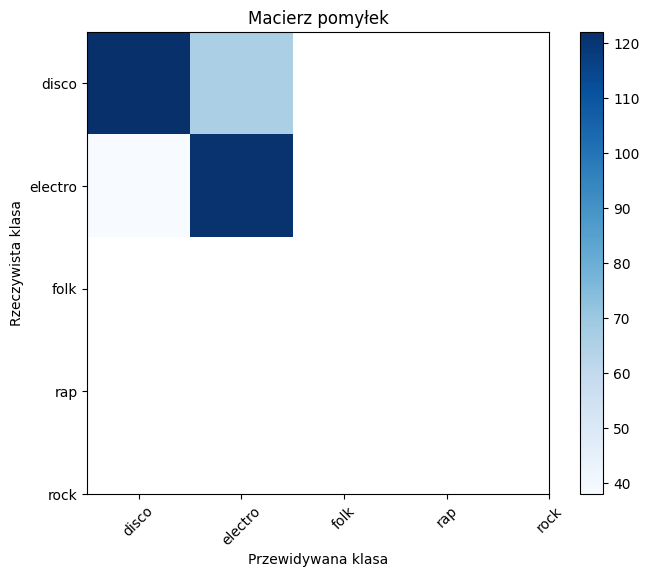

In [44]:
# Wyświetlenie macierzy pomyłek
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Macierz pomyłek')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Przewidywana klasa')
plt.ylabel('Rzeczywista klasa')
plt.show()

In [48]:
def create_cnn_model(inShape, convNum, hNum, hAct, outNum, loss):
    """
    :param inShape: kształt wejścia, h*w*c
    :param convNum: lista ilości featerów w warstwach konwolucyjnych
    :param hNum: lista ilości neuronów w poszczególnych warstwach ukrytych
    :param hAct: rodzaj aktywacji w warstwach ukrytych, str
    :param outNum: ilość
    :param loss: funkcja kosztu
    """
    # pusty model
    model = tf.keras.Sequential()
    # warstwa wejściowa
    model.add(layers.InputLayer(input_shape=(inShape)))
    # warstwy konwolucyjne
    for idx, oneConvNum in enumerate(convNum):
        # dodajemy kolejną warstwę konwolucyjną
        # zmienia nam ilość cech(kanałów) na oneConvNum
        model.add(layers.Conv2D(
                                    filters=oneConvNum,
                                    kernel_size=3,
                                    strides=1,
                                    padding="SAME",
                                    activation="relu"
                                    )
                                )
        # doajemy następującego po convie maxpool'a
        # zmniejsza nam wymiarowość HxW o połowę
        model.add(layers.MaxPool2D(
                                    pool_size=(2, 2),
                                    strides=2,
                                    padding="SAME"
                                    )
                                )
    # spłaszczamy po konwolucjach, przygotowanie pod relu
    model.add(layers.Flatten())
    # warstwy fully connected
    for idx, oneHidNum in enumerate(hNum):
        # dodajemy warstwę
        model.add(layers.Dense(oneHidNum, activation=hAct))
    # warstwa wyjściowa
    model.add(layers.Dense(outNum))
    # warstwa softmax, dystrybucja prawdopodobieństwa
    model.add(layers.Softmax())
    print(model.summary())

    opt = tf.keras.optimizers.Adam()

    model.compile(
        optimizer=opt,
        loss=loss,
        metrics=["accuracy"]
    )

    return model

In [51]:
#cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
#print(cm)

In [55]:
model_a = create_cnn_model(
    inShape=x_train.shape[1:],
    convNum=[16,32],
    hNum=[200],
    hAct="relu",
    outNum=num_classes,
    loss=tf.keras.losses.CategoricalCrossentropy()
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 64800)             0         
                                                                 
 dense_6 (Dense)             (None, 200)              

In [66]:
#testowanie

_pred_np = np.array(y_pred)
y_test_np = tf.argmax(y_test, axis=1).numpy()
y_pred_np_argmax = tf.argmax(y_pred_np, axis=1).numpy()
print(classification_report(y_test_np, y_pred_np_argmax))

              precision    recall  f1-score   support

           0       0.67      0.03      0.06       188
           1       0.00      0.00      0.00       159
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.02       347
   macro avg       0.13      0.01      0.01       347
weighted avg       0.36      0.02      0.03       347



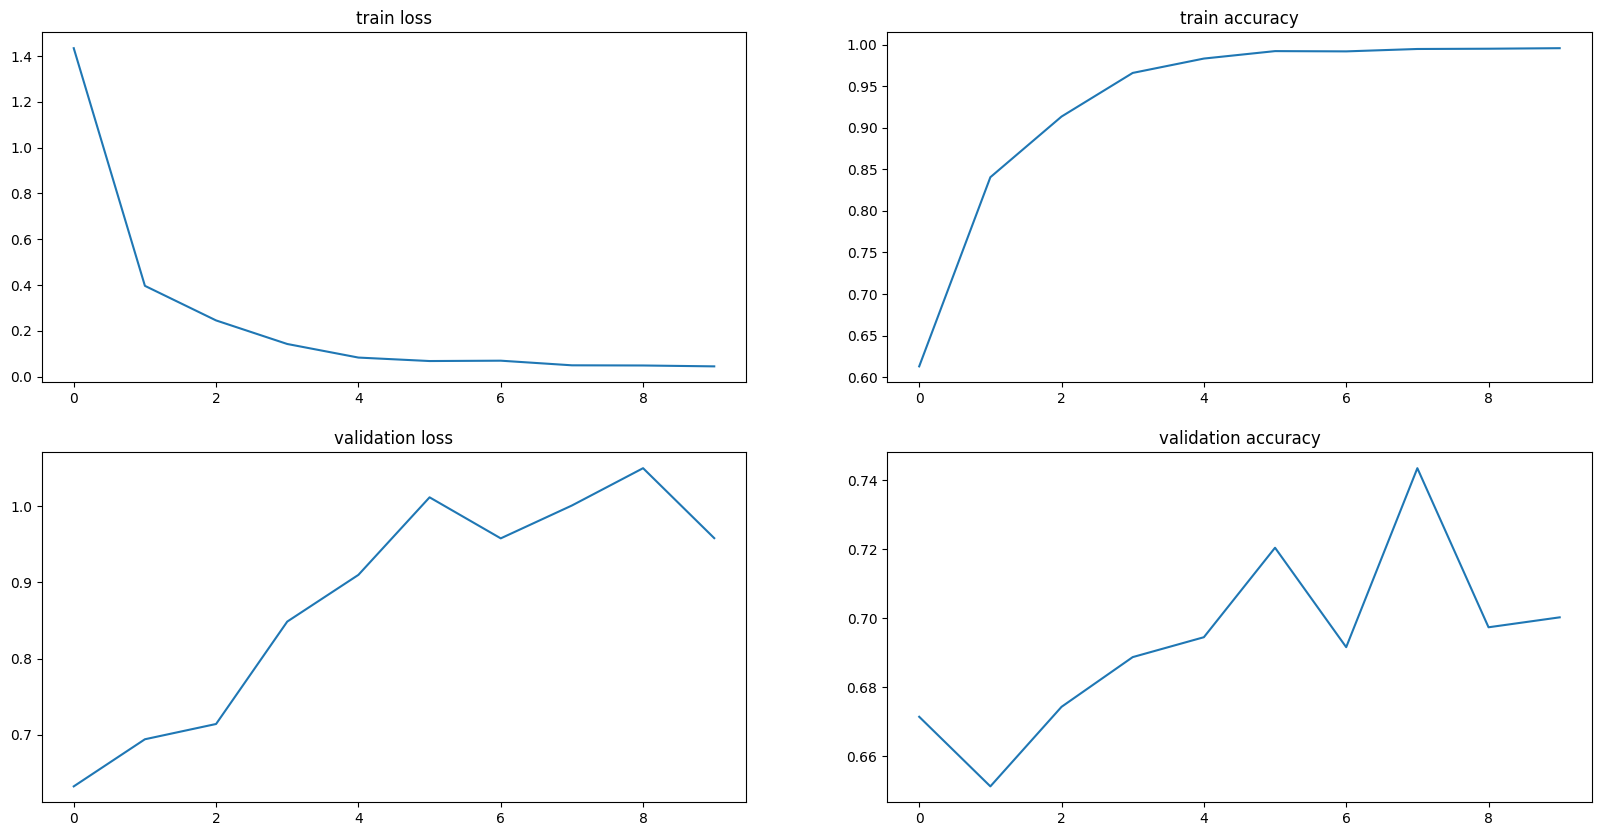

In [67]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(20,10))
# wyświetlamy wykresy
ax[0][0].plot(history.history["loss"])
ax[0][1].plot(history.history["accuracy"])
ax[1][0].plot(history.history["val_loss"])
ax[1][1].plot(history.history["val_accuracy"])
#nazywamy zdjęcia
ax[0][0].set_title("train loss")
ax[0][1].set_title("train accuracy")
ax[1][0].set_title("validation loss")
ax[1][1].set_title("validation accuracy")
plt.show()



<class 'tensorflow.python.framework.ops.EagerTensor'>
(347, 5)
<class 'numpy.ndarray'>
(347, 5)


In [68]:
model_c = create_cnn_model(
    inShape=x_train.shape[1:],
    convNum=[32,32,64,64],
    hNum=[200],
    hAct="relu",
    outNum=num_classes,
    loss=tf.keras.losses.CategoricalCrossentropy()
)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 23, 23, 64)      

In [70]:
history = model_c.fit(
    x=x_train,
    y=y_train,
    batch_size=200,
    epochs=10,
    validation_split=0.05
)


Epoch 1/10
15/15 [==============================] - 12s 448ms/step - loss: 0.8117 - accuracy: 0.5061 - val_loss: 0.7060 - val_accuracy: 0.4904
Epoch 2/10
15/15 [==============================] - 2s 144ms/step - loss: 0.6581 - accuracy: 0.6106 - val_loss: 0.6287 - val_accuracy: 0.6306
Epoch 3/10
15/15 [==============================] - 2s 145ms/step - loss: 0.6294 - accuracy: 0.6467 - val_loss: 0.6326 - val_accuracy: 0.6497
Epoch 4/10
15/15 [==============================] - 2s 157ms/step - loss: 0.5931 - accuracy: 0.6797 - val_loss: 0.6039 - val_accuracy: 0.6688
Epoch 5/10
15/15 [==============================] - 2s 163ms/step - loss: 0.5649 - accuracy: 0.7057 - val_loss: 0.5694 - val_accuracy: 0.6815
Epoch 6/10
15/15 [==============================] - 2s 154ms/step - loss: 0.5768 - accuracy: 0.7003 - val_loss: 0.5898 - val_accuracy: 0.6943
Epoch 7/10
15/15 [==============================] - 2s 146ms/step - loss: 0.5524 - accuracy: 0.7171 - val_loss: 0.5654 - val_accuracy: 0.7006
Epoch

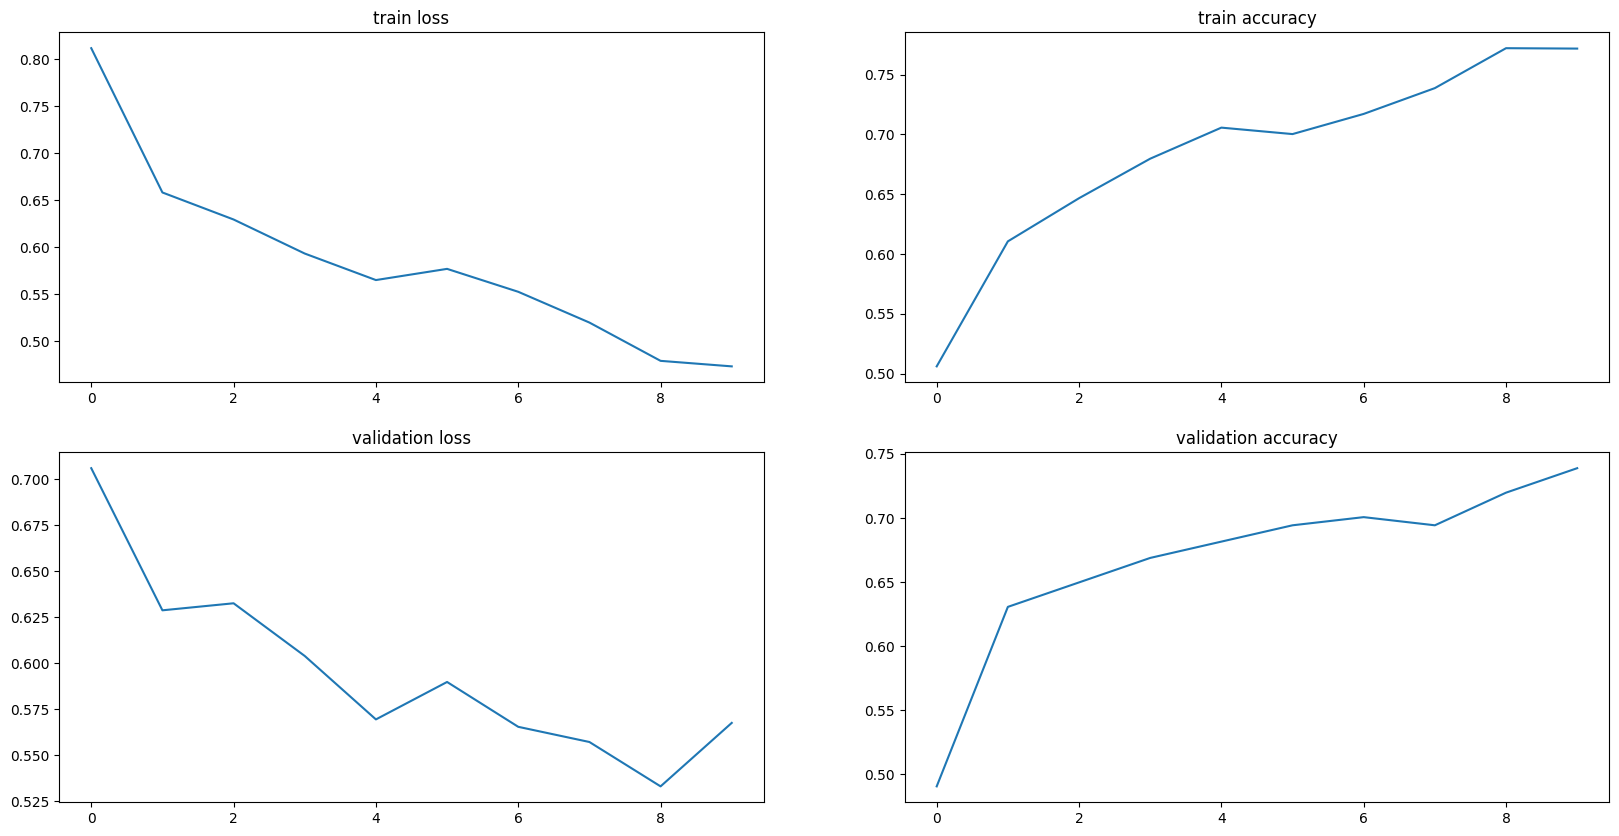

11/11 [==============================] - 0s 17ms/step
              precision    recall  f1-score   support

           0       0.65      0.79      0.72       188
           1       0.67      0.50      0.58       159

    accuracy                           0.66       347
   macro avg       0.66      0.65      0.65       347
weighted avg       0.66      0.66      0.65       347



In [73]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(20,10))
# wyświetlamy wykresy
ax[0][0].plot(history.history["loss"])
ax[0][1].plot(history.history["accuracy"])
ax[1][0].plot(history.history["val_loss"])
ax[1][1].plot(history.history["val_accuracy"])
#nazywamy zdjęcia
ax[0][0].set_title("train loss")
ax[0][1].set_title("train accuracy")
ax[1][0].set_title("validation loss")
ax[1][1].set_title("validation accuracy")
plt.show()

# testowanie
y_pred = model_c.predict(x_test)
y_test_np = y_test.numpy()

print(classification_report(y_test_np.argmax(axis=1), y_pred.argmax(axis=1)))